In [1]:
import numpy as np
import os
import pickle
from data_processing.cifar_100 import Cifar100
from data_processing.data_generator import DataGenerator
from data_processing.transforms import *
import matplotlib.pyplot as plt
import torch
from approach_1.models import ResNet
import torch.optim as optim

%load_ext autoreload
%autoreload 2

In [10]:
model = ResNet()

In [11]:
y = model.forward(torch.tensor(example_batch['image'], dtype=torch.float32))

In [12]:
y.shape

torch.Size([32, 20])

In [3]:
train.classes

{0: 'aquatic_mammals',
 1: 'fish',
 2: 'flowers',
 3: 'food_containers',
 4: 'fruit_and_vegetables',
 5: 'household_electrical_devices',
 6: 'household_furniture',
 7: 'insects',
 8: 'large_carnivores',
 9: 'large_man-made_outdoor_things',
 10: 'large_natural_outdoor_scenes',
 11: 'large_omnivores_and_herbivores',
 12: 'medium_mammals',
 13: 'non-insect_invertebrates',
 14: 'people',
 15: 'reptiles',
 16: 'small_mammals',
 17: 'trees',
 18: 'vehicles_1',
 19: 'vehicles_2'}

In [3]:
hparams = {
    'batch_size': 8,
    'learning_rate': 1e-2,
    'epochs': 1
}

model = ResNet(hparams=hparams)

repo_root = os.path.abspath(os.getcwd())
data_root = os.path.join(repo_root, "data")
seed = 69
split = 0.7

#CNN_model = torch.load(path)
#CNN_model = nn.Sequential(*(list(CNN_model.children())[:-2]))
#for param in CNN_model.parameters():
#    param.requires_grad = False
transforms = [RescaleTransform(), ReshapeToTensor(), Patches(patch_size=16), Resize()]#, PassThroughCNN(CNN_model)]

train = Cifar100(root=data_root, purpose='train', seed=seed, split=split, transform=transforms)
val = Cifar100(root=data_root, purpose='val', seed=seed, split=split, transform=transforms)
test = Cifar100(root=data_root, purpose='test', seed=seed, split=split, transform=transforms)

train_loader = DataGenerator(train, batch_size=model.hparams['batch_size'])
val_loader = DataGenerator(val, batch_size=model.hparams['batch_size'])

criterion = torch.nn.CrossEntropyLoss()
#remember to one hot encode labels!

optimizer = optim.AdamW(list(model.feature_extractor.parameters())+list(model.AdAvgP.parameters())+list(model.FC.parameters()), lr=model.hparams["learning_rate"])

train_loss_history = [] # loss
train_acc_history = [] # accuracy


for epoch in range(hparams['epochs']):
     
    running_loss = 0.0
 
    # Iterating through the minibatches of the data
    for i, batch in enumerate(train_loader):
        
        image, labels = batch['image'], batch['label']

        labels = torch.tensor(labels, dtype=torch.long)

        #labels_onehot = np.zeros((labels.size, model.num_classes))
        #labels_onehot[np.arange(labels.size), labels] = 1
        #labels_onehot = torch.tensor(labels_onehot)

        #image = image.to(device)
        #labels = labels.to(device)
 
        optimizer.zero_grad()              # Reset the parameter gradients  for the current  minibatch iteration
        predictions = model.forward(torch.tensor(image, dtype=torch.float32))         # Perform a forward pass on the network with inputs

        loss = criterion(predictions, labels) # calculate the loss with the network predictions and ground Truth
        loss.backward()             # Perform a backward pass to calculate the gradients
        optimizer.step()            # Optimize the network parameters with calculated gradients

        
        # Accumulate the loss and calculate the accuracy of predictions
        running_loss += loss.item()

        # Print statistics to console
        if i % 1 == 0: # print every 10 mini-batches
            running_loss /= 1
            print("[Epoch %d, Iteration %5d] loss: %.5f" % (epoch+1, i+1, running_loss))
            train_loss_history.append(running_loss)
            running_loss = 0.0

print('FINISH.')

[Epoch 1, Iteration     1] loss: 3.15119
[Epoch 1, Iteration     2] loss: 6.55386
[Epoch 1, Iteration     3] loss: 12.97375
[Epoch 1, Iteration     4] loss: 8.27364
[Epoch 1, Iteration     5] loss: 6.34709
[Epoch 1, Iteration     6] loss: 5.60924
[Epoch 1, Iteration     7] loss: 4.54106
[Epoch 1, Iteration     8] loss: 5.27723
[Epoch 1, Iteration     9] loss: 4.70683
[Epoch 1, Iteration    10] loss: 5.79413
[Epoch 1, Iteration    11] loss: 4.46769
[Epoch 1, Iteration    12] loss: 4.34472
[Epoch 1, Iteration    13] loss: 3.81410
[Epoch 1, Iteration    14] loss: 4.27671
[Epoch 1, Iteration    15] loss: 5.78943
[Epoch 1, Iteration    16] loss: 2.75463
[Epoch 1, Iteration    17] loss: 3.70401
[Epoch 1, Iteration    18] loss: 5.29587
[Epoch 1, Iteration    19] loss: 6.46343
[Epoch 1, Iteration    20] loss: 4.26429
[Epoch 1, Iteration    21] loss: 4.07189
[Epoch 1, Iteration    22] loss: 4.76640
[Epoch 1, Iteration    23] loss: 3.59940
[Epoch 1, Iteration    24] loss: 4.41170
[Epoch 1, Itera

KeyboardInterrupt: 

In [8]:
os.makedirs('trained_models', exist_ok=True)
model.save(os.path.join(repo_root, "trained_models\dummy_resnet.model"))

Saving model... e:\!LMU\PythonProjects\cv_attention\trained_models\dummy_resnet.model


In [2]:
repo_root = os.path.abspath(os.getcwd())
data_root = os.path.join(repo_root, "data")
seed = 69
split = 0.7
transforms = [RescaleTransform(), ReshapeToTensor(), Patches(patch_size=16), Resize()]
batch_size = 8

In [3]:
train = Cifar100(root=data_root, purpose='train', seed=seed, split=split, transform=transforms)
val = Cifar100(root=data_root, purpose='val', seed=seed, split=split, transform=transforms)
test = Cifar100(root=data_root, purpose='test', seed=seed, split=split, transform=transforms)

In [4]:
train_loader = DataGenerator(train, batch_size=batch_size)
val_loader = DataGenerator(val, batch_size=batch_size)

In [26]:
train[1]

{'image': array([[[[0.03529412, 0.04313725, 0.05098039, ..., 0.04705882,
           0.04705882, 0.04705882],
          [0.03529412, 0.04313725, 0.04705882, ..., 0.04313725,
           0.05098039, 0.05882353],
          [0.03137255, 0.03921569, 0.04705882, ..., 0.0627451 ,
           0.06666667, 0.06666667],
          ...,
          [0.43529412, 0.56078431, 0.63137255, ..., 0.42352941,
           0.61960784, 0.69411765],
          [0.49019608, 0.54509804, 0.54901961, ..., 0.46666667,
           0.54509804, 0.50588235],
          [0.47843137, 0.44705882, 0.54509804, ..., 0.49019608,
           0.5372549 , 0.42745098]],
 
         [[0.1254902 , 0.13333333, 0.14117647, ..., 0.16862745,
           0.16862745, 0.16862745],
          [0.1372549 , 0.14509804, 0.14901961, ..., 0.18039216,
           0.17647059, 0.17647059],
          [0.14901961, 0.15686275, 0.16470588, ..., 0.19607843,
           0.19215686, 0.18823529],
          ...,
          [0.41960784, 0.56078431, 0.6       , ..., 0.4156

In [6]:
example_batch = next(iter(train_loader))
example_batch
#example_img = example_batch['image'][0][1]
#plt.imshow(example_img)

{'image': array([[[[0.01486332, 0.01479185, 0.01477216, ..., 0.28798445,
           0.28789722, 0.28758074],
          [0.01485992, 0.01478815, 0.01476838, ..., 0.28608984,
           0.28600237, 0.285685  ],
          [0.01485898, 0.01478713, 0.01476734, ..., 0.28556789,
           0.28548035, 0.28516273],
          ...,
          [0.02697161, 0.02689218, 0.02687029, ..., 0.77027991,
           0.77036542, 0.77067567],
          [0.02695661, 0.02687668, 0.02685466, ..., 0.76925862,
           0.76934532, 0.76965989],
          [0.02690217, 0.02682047, 0.02679797, ..., 0.76555319,
           0.76564421, 0.76597443]],
 
         [[0.00392157, 0.00388753, 0.00387816, ..., 0.18784248,
           0.18778339, 0.187569  ],
          [0.0039556 , 0.00392157, 0.00391219, ..., 0.18758154,
           0.1875222 , 0.18730693],
          [0.00396498, 0.00393095, 0.00392157, ..., 0.18750965,
           0.18745025, 0.18723473],
          ...,
          [0.01564277, 0.01563899, 0.01563795, ..., 0.7102

In [74]:
example_batch['label'].shape

(32,)

In [6]:
def img_to_patch(x, patch_size, flatten_channels=True):
    """
    Inputs:
        x - torch.Tensor representing the image of shape [B, C, H, W]
        patch_size - Number of pixels per dimension of the patches (integer)
        flatten_channels - If True, the patches will be returned in a flattened format
                           as a feature vector instead of a image grid.
    """

    x = x[None, :]
    x = torch.tensor(x)
    B, H, W, C = x.shape
    x = x.reshape(B, H//patch_size, patch_size, W//patch_size, patch_size, C)
    x = x.permute(0, 1, 3, 5, 2, 4) # [B, H', W', C, p_H, p_W]
    x = x.flatten(1,2)              # [B, H'*W', C, p_H, p_W]
    '''
    B, C, H, W = x.shape
    x = x.reshape(B, C, H//patch_size, patch_size, W//patch_size, patch_size)
    x = x.permute(0, 2, 4, 1, 3, 5) # [B, H', W', C, p_H, p_W]
    x = x.flatten(1,2)              # [B, H'*W', C, p_H, p_W]
    '''
    if flatten_channels:
        x = x.flatten(2,4)          # [B, H'*W', C*p_H*p_W]
    return x

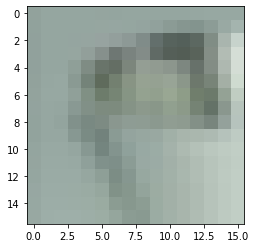

In [11]:
patches = img_to_patch(example_img, 16, flatten_channels=False)
patches.shape
plt.imshow(patches.squeeze()[0].permute(1,2,0))

In [18]:
patches.squeeze()[0].shape
patches2 = patches.squeeze()[0].permute(1,2,0).numpy()

In [19]:
patches2.shape

(16, 16, 3)

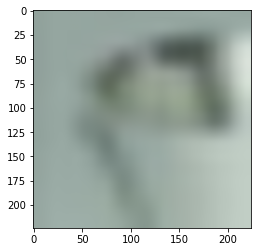

In [20]:
import cv2
newsize = (224, 224)
newimage = cv2.resize(patches2, dsize=newsize, interpolation=cv2.INTER_CUBIC)
plt.imshow(newimage)

In [65]:
del(train)
del(test)
del(val)

NameError: name 'train' is not defined

In [23]:
    def unpickle(file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

In [24]:
x = unpickle(f'{data_root}\\cifar-100-python\\train')

In [28]:
x.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])